# <center> Model selection
# <center> News Lenta.ru dataset  
### <center> by Glazunov Artem

Works via Google Colab

Let's connect directories and load useful libs.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/'My Drive'/Colab_Notebooks/project_intern

/content/gdrive/My Drive/Colab_Notebooks/project_intern


In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 2.8MB/s 
     |████████████████████████████████| 552kB 19.8MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=9da9b21c7e0716128bdc0b659686ccc96874611a69e3b3c937152b5a65bc13ac
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=65e97da628a2a0a77af888af7d1e04b363fb4b08e9128b6822260326b290557b
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [ ]:
import os
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora

from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline

# vectorizing and so on
from sklearn.feature_extraction.text import CountVectorizer
import warnings
from tqdm import tqdm_notebook


In [ ]:
PATH_TO_DATA = 'texts_after_preproc'

Loading the preprocessed small data

In [ ]:
data = pd.read_csv(os.path.join(PATH_TO_DATA,'texts_part.csv'),index_col=0)
data

texts
464829  крупный сша нефтяной компания сша exxonmobil п...
491243  немецкий нейробиолог обнаруживать первичный ви...
479662  банк москва продавать принадлежать пять процен...
92658   продолжаться сегодня столица катар судебный за...
358436  nasa называть семь плохой семь хороший точка з...
...                                                   ...
641460  официальный представитель мид россия мария зах...
635248  заявление вмешательство россия проведение рефе...
786620  оператор связь вымпелком билайн прокомментиров...
325153  представитель овд саяногорск опровергать инфор...
164156  московский милиция задерживать около десять че...

[100121 rows x 1 columns]

In [ ]:
data_list = data.texts.values.tolist()
data_list[:4]

['крупный сша нефтяной компания сша exxonmobil помощь компания катар построить техас терминал сжижение дальнейший экспорт природный газ общий стоимость десять миллиард доллар соответствующий соглашение exxonmobil подписывать qatar petroleum international передавать bloomberg реализация проект сторона образовывать дочерний предприятие golden pass products llc фирма прошлый год получать разрешение экспорт спг страна который сша иметься соглашение свободный торговля прием спг терминал golden pass работать 2010 год планироваться ежегодный объем поставка спг построить терминал составлять 156 миллион тонна проект должный получать окончательный одобрение американский власть апрель сообщаться exxonmobil также собираться построить самый большой мир плавучий завод выпуск спг сотрудничество англоавстралийский горнодобывающий bhp billiton затрата указанный проект оценка эксперт превышать 12 миллиард доллар мощность спгзавод достигать шестисемь миллион тонна год',
 'немецкий нейробиолог обнаруживат

Vectorization

In [ ]:
vectorizer = CountVectorizer(ngram_range=(1, 2),min_df=80,max_df =0.2)
matrix = vectorizer.fit_transform(data_list)

In [ ]:
vectorizer.vocabulary_

{'крупный': 8515,
 'сша': 18526,
 'нефтяной': 10651,
 'компания': 7828,
 'помощь': 13349,
 'катар': 7533,
 'построить': 13593,
 'техас': 18895,
 'терминал': 18854,
 'дальнейший': 5049,
 'экспорт': 20853,
 'природный': 14341,
 'газ': 4133,
 'общий': 11169,
 'стоимость': 18160,
 'десять': 5373,
 'миллиард': 9406,
 'доллар': 5665,
 'соответствующий': 17563,
 'соглашение': 17349,
 'подписывать': 12935,
 'international': 1346,
 'передавать': 12440,
 'bloomberg': 1196,
 'реализация': 15497,
 'проект': 14555,
 'сторона': 18196,
 'образовывать': 11094,
 'дочерний': 5821,
 'предприятие': 13860,
 'фирма': 20001,
 'прошлый': 14890,
 'разрешение': 15226,
 'иметься': 6951,
 'свободный': 16435,
 'торговля': 18997,
 'прием': 14203,
 'работать': 15059,
 '2010': 548,
 'планироваться': 12656,
 'ежегодный': 5941,
 'объем': 11196,
 'поставка': 13550,
 'составлять': 17613,
 '156': 235,
 'миллион': 9416,
 'тонна': 18982,
 'должный': 5623,
 'окончательный': 11458,
 'одобрение': 11355,
 'американский': 1993,


Preparation

In [ ]:
def vect2gensim(vectorizer, dtmatrix):
     # transform sparse matrix into gensim corpus and dictionary
    corpus_vect_gensim = gensim.matutils.Sparse2Corpus(dtmatrix, documents_columns=False)
    dictionary = gensim.corpora.dictionary.Dictionary.from_corpus(corpus_vect_gensim,
        id2word=dict((id, word) for word, id in vectorizer.vocabulary_.items()))

    return (corpus_vect_gensim, dictionary)

In [ ]:
(gensim_corpus, gensim_dict) = vect2gensim(vectorizer, matrix)

In [ ]:
def corpus2words_lists(gensim_corpus,gensim_dict):

  #Converts corpus to texts in the form of words lists for gensim Coherence model 

  dictionary = dict(gensim_dict)
  corpus_list = list(gensim_corpus)

  texts_new = []
  for text_meta in corpus_list:
    text_new=[]
    for pair in text_meta:
      for counter in range(1,pair[1]+1):
        text_new.append(dictionary[pair[0]])
    texts_new.append(text_new)

  return texts_new

In [ ]:
data_words = corpus2words_lists(gensim_corpus,gensim_dict)

Firstly, I want to check the LSA model

In [ ]:
%%time
# Build LSA model
lsamodel = gensim.models.LsiModel(gensim_corpus, num_topics=15, id2word = gensim_dict,power_iters=5)

CPU times: user 50.7 s, sys: 5.18 s, total: 55.9 s
Wall time: 41.2 s


In [ ]:
# Compute Coherence Score
coherence_model_lsa = CoherenceModel(model=lsamodel, texts=data_words, dictionary=gensim_dict, coherence='c_v')
coherence_lsa = coherence_model_lsa.get_coherence()
print('Coherence Score: ', coherence_lsa)

Coherence Score:  0.495504629954695


This score is not good, let's optimize the number of  topics.


In [ ]:
%%time
warnings.filterwarnings("ignore")
numbers = [10,15,18,20,25]

coherences = []
for num_topics in tqdm_notebook(numbers):
  
  lsamodel = gensim.models.LsiModel(gensim_corpus, 
                                    num_topics=num_topics, 
                                    id2word = gensim_dict,
                                    power_iters=2)

  coherence_model_lsa = CoherenceModel(model=lsamodel, texts=data_words, dictionary=gensim_dict, coherence='c_v')
  coherences.append(coherence_model_lsa.get_coherence())


CPU times: user 9min 59s, sys: 17.7 s, total: 10min 17s
Wall time: 9min 30s


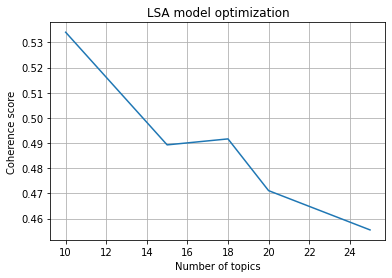

In [ ]:
plt.plot(numbers,coherences)
plt.title('LSA model optimization')
plt.xlabel('Number of topics')
plt.ylabel('Coherence score')
plt.grid(True)

In [ ]:
%%time
best_lsamodel = gensim.models.LsiModel(gensim_corpus, num_topics=5, id2word = gensim_dict,power_iters=30)

CPU times: user 3min 18s, sys: 20.7 s, total: 3min 39s
Wall time: 2min 46s


That's better, let's see the coherence score and the most important words

In [ ]:
# Compute Coherence Score
coherence_model_lsa = CoherenceModel(model=best_lsamodel, texts=data_words, dictionary=gensim_dict, coherence='c_v')
coherence_lsa = coherence_model_lsa.get_coherence()
print('Coherence Score: ', coherence_lsa)

Coherence Score:  0.6340427513575773


In [ ]:
pprint(best_lsamodel.print_topics())

[(0,
  '0.218*"процент" + 0.185*"компания" + 0.151*"президент" + 0.149*"доллар" + '
  '0.139*"тысяча" + 0.132*"миллион" + 0.125*"рубль" + 0.119*"сша" + '
  '0.119*"дело" + 0.106*"миллиард"'),
 (1,
  '-0.541*"процент" + -0.260*"доллар" + -0.202*"компания" + -0.199*"рубль" + '
  '-0.191*"миллиард" + 0.162*"президент" + -0.160*"составлять" + '
  '-0.150*"миллион" + 0.137*"дело" + -0.104*"цена"'),
 (2,
  '-0.561*"процент" + -0.281*"президент" + 0.263*"компания" + 0.240*"миллион" '
  '+ 0.200*"доллар" + -0.181*"украина" + -0.148*"выборы" + 0.128*"рубль" + '
  '0.126*"тысяча" + 0.107*"суд"'),
 (3,
  '0.326*"процент" + -0.306*"доллар" + -0.239*"украина" + -0.224*"сша" + '
  '-0.214*"компания" + -0.213*"президент" + -0.193*"миллиард" + 0.179*"дело" + '
  '0.165*"рубль" + 0.147*"тысяча"'),
 (4,
  '-0.272*"дело" + -0.259*"суд" + 0.230*"матч" + -0.206*"рубль" + '
  '-0.192*"украина" + 0.173*"команда" + 0.155*"сборная" + 0.150*"игра" + '
  '0.143*"место" + -0.138*"миллиард"')]


We have comparatively high coherence, but the topics are not interpretive. Let's try more iterations and topics.

In [ ]:
best_lsamodel = gensim.models.LsiModel(gensim_corpus, num_topics=15, id2word = gensim_dict,power_iters=30)
pprint(best_lsamodel.print_topics())

[(0,
  '0.218*"процент" + 0.185*"компания" + 0.151*"президент" + 0.149*"доллар" + '
  '0.139*"тысяча" + 0.133*"миллион" + 0.125*"рубль" + 0.119*"сша" + '
  '0.119*"дело" + 0.106*"миллиард"'),
 (1,
  '-0.540*"процент" + -0.261*"доллар" + -0.203*"компания" + -0.198*"рубль" + '
  '-0.190*"миллиард" + 0.161*"президент" + -0.160*"составлять" + '
  '-0.150*"миллион" + 0.137*"дело" + -0.104*"цена"'),
 (2,
  '-0.556*"процент" + -0.284*"президент" + 0.260*"компания" + 0.237*"миллион" '
  '+ -0.194*"украина" + 0.193*"доллар" + -0.143*"выборы" + 0.131*"тысяча" + '
  '0.127*"рубль" + -0.106*"глава"'),
 (3,
  '0.338*"процент" + -0.309*"доллар" + -0.239*"украина" + -0.225*"сша" + '
  '-0.219*"компания" + -0.210*"президент" + -0.196*"миллиард" + 0.173*"дело" + '
  '0.155*"рубль" + -0.146*"миллиард доллар"'),
 (4,
  '-0.259*"суд" + -0.256*"дело" + 0.233*"матч" + -0.220*"рубль" + '
  '-0.200*"украина" + 0.176*"команда" + 0.157*"сборная" + 0.152*"игра" + '
  '0.142*"место" + -0.141*"миллиард"'),
 (5,
  

I think, that LSA model is not a good fit for our task. Let's try LDA model.

In [ ]:
%%time
# Build LDA model
warnings.filterwarnings("ignore")

lda_model = gensim.models.LdaMulticore(corpus=gensim_corpus,
                                           id2word=gensim_dict,
                                           num_topics=15, 
                                           random_state=100,                                           
                                           workers = 3,
                                            passes=1
                                        )

CPU times: user 2min 27s, sys: 2.25 s, total: 2min 29s
Wall time: 2min 45s


In [ ]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=gensim_dict, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.6333201191617532


In [ ]:
pprint(lda_model.print_topics())

[(0,
  '0.013*"матч" + 0.009*"команда" + 0.009*"сборная" + 0.008*"чемпионат" + '
  '0.006*"счет" + 0.006*"мир" + 0.005*"игра" + 0.005*"клуб" + 0.005*"место" + '
  '0.005*"победа"'),
 (1,
  '0.023*"процент" + 0.014*"компания" + 0.009*"миллион" + 0.008*"составлять" + '
  '0.008*"доллар" + 0.008*"тысяча" + 0.007*"миллиард" + 0.006*"рубль" + '
  '0.005*"рынок" + 0.004*"метр"'),
 (2,
  '0.011*"самолет" + 0.006*"военный" + 0.004*"ракета" + 0.004*"сша" + '
  '0.004*"аэропорт" + 0.004*"город" + 0.003*"сирия" + 0.003*"авиакомпания" + '
  '0.003*"американский" + 0.003*"корабль"'),
 (3,
  '0.007*"происходить" + 0.006*"результат" + 0.005*"погибать" + '
  '0.005*"находиться" + 0.004*"взрыв" + 0.004*"пожар" + 0.004*"город" + '
  '0.004*"около" + 0.004*"район" + 0.004*"пострадать"'),
 (4,
  '0.011*"фильм" + 0.006*"the" + 0.006*"игра" + 0.004*"картина" + '
  '0.004*"компания" + 0.004*"роль" + 0.004*"проект" + 0.004*"выходить" + '
  '0.004*"американский" + 0.004*"режиссер"'),
 (5,
  '0.006*"украина" + 

We have much better quality. Let's optimize.

In [ ]:
%%time
warnings.filterwarnings("ignore")
numbers = [10,15,18,20,25]

coherences = []
for num_topics in tqdm_notebook(numbers):
  

  lda_model = gensim.models.LdaMulticore(corpus=gensim_corpus,
                                           id2word=gensim_dict,
                                           num_topics=num_topics, 
                                           random_state=100,                                           
                                           workers = 3,
                                            passes=1
                                        )
  coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=gensim_dict, coherence='c_v')
  coherences.append(coherence_model_lda.get_coherence())


CPU times: user 23min 10s, sys: 10.3 s, total: 23min 20s
Wall time: 24min 31s


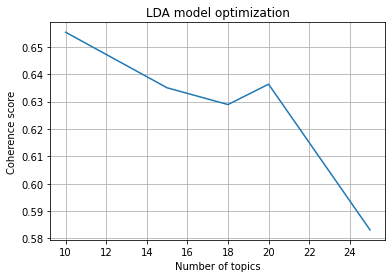

In [ ]:
plt.plot(numbers,coherences)
plt.title('LDA model optimization')
plt.xlabel('Number of topics')
plt.ylabel('Coherence score')
plt.grid(True)

We know, that 10 topics is too little, that is why I will choose 20 topics and see results.

In [ ]:
%%time
best_lda_model = gensim.models.LdaMulticore(corpus=gensim_corpus,
                                           id2word=gensim_dict,
                                           num_topics=20, 
                                           random_state=100,                                           
                                           workers = 3,
                                            passes=5
                                        )

CPU times: user 11min 23s, sys: 7.03 s, total: 11min 30s
Wall time: 11min 57s


In [ ]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=best_lda_model, texts=data_words, dictionary=gensim_dict, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.6709457821930502


In [ ]:
pprint(best_lda_model.print_topics())

[(0,
  '0.014*"мир" + 0.009*"олимпийский" + 0.008*"спортсмен" + 0.008*"место" + '
  '0.007*"бой" + 0.007*"победа" + 0.007*"чемпион" + 0.007*"чемпионат" + '
  '0.006*"конкурс" + 0.006*"международный"'),
 (1,
  '0.031*"процент" + 0.023*"тысяча" + 0.014*"составлять" + 0.013*"рубль" + '
  '0.011*"миллион" + 0.008*"метр" + 0.008*"квадратный" + 0.008*"москва" + '
  '0.007*"площадь" + 0.007*"квадратный метр"'),
 (2,
  '0.016*"военный" + 0.007*"боевик" + 0.006*"сила" + 0.006*"войско" + '
  '0.005*"израиль" + 0.005*"сша" + 0.005*"сирия" + 0.005*"ирак" + '
  '0.005*"армия" + 0.005*"американский"'),
 (3,
  '0.009*"происходить" + 0.009*"самолет" + 0.007*"результат" + '
  '0.007*"погибать" + 0.007*"находиться" + 0.006*"взрыв" + 0.006*"аэропорт" + '
  '0.005*"город" + 0.005*"пассажир" + 0.005*"пострадать"'),
 (4,
  '0.020*"фильм" + 0.011*"игра" + 0.008*"the" + 0.007*"роль" + '
  '0.007*"выходить" + 0.007*"картина" + 0.007*"актер" + 0.006*"режиссер" + '
  '0.006*"американский" + 0.005*"главный"'),
 (

We have good topics. Let's see some pictures.

In [ ]:
def plot_difference(mdiff, title="", annotation=None):
    """Helper function to plot difference between models.

    Uses matplotlib as the backend."""
    
    fig, ax = plt.subplots(figsize=(18, 14))
    data = ax.imshow(mdiff, cmap='RdBu_r', origin='lower')
    plt.title(title)
    plt.colorbar(data)

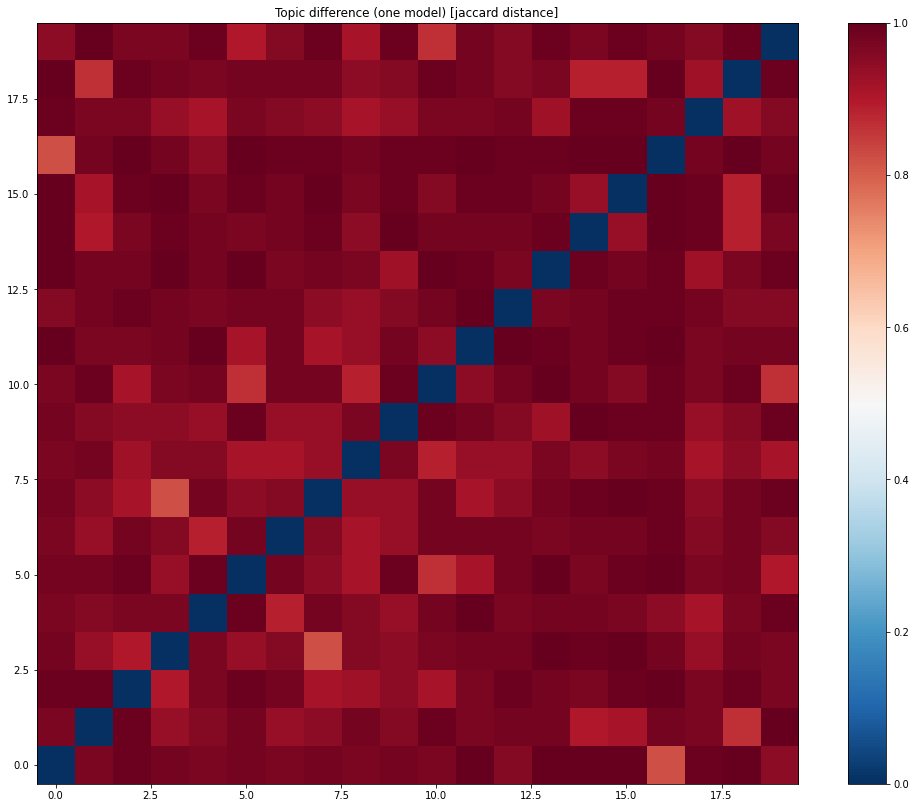

In [ ]:
mdiff, annotation = best_lda_model.diff(best_lda_model, distance='jaccard', num_words=50)
plot_difference(mdiff, title="Topic difference (one model) [jaccard distance]", annotation=annotation)

Our topics are not dependent, but let's cut the number of topics to 15 further. Let's see the topics.

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(best_lda_model, gensim_corpus, gensim_dict)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
7      0.164097  0.072718       1        1  8.207788
5      0.048120  0.142368       2        1  7.379759
10     0.101033  0.068268       3        1  7.379062
11     0.118851  0.094141       4        1  6.523343
18    -0.205851  0.055792       5        1  6.261057
19     0.134133  0.075769       6        1  6.137958
3      0.054288  0.113384       7        1  6.011838
2      0.116759  0.122498       8        1  5.844741
8      0.092747 -0.016242       9        1  5.654286
14    -0.216941  0.081812      10        1  4.572900
9     -0.052206 -0.046390      11        1  4.282257
1     -0.251501  0.037944      12        1  4.276420
16     0.035335 -0.207009      13        1  4.243981
6      0.030369 -0.165511      14        1  4.057515
4      0.022221 -0.213086      15        1  3.822083
13    -0.045061 -0.084042      16        1  3.736226
17     0.032089 -0.032239      17        1  3.624696
15    -0.108295  0.108611      18        1  2.900669
12    -0.107723 -0.029550      19        1  2.864329
0      0.037536 -0.179237      20        1  2.219097, topic_info=           Term          Freq         Total Category  logprob  loglift
183     процент  40104.000000  40104.000000  Default  30.0000  30.0000
317         суд  23445.000000  23445.000000  Default  29.0000  29.0000
3      компания  40560.000000  40560.000000  Default  28.0000  28.0000
1242    украина  22347.000000  22347.000000  Default  27.0000  27.0000
17       доллар  29901.000000  29901.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
382   проходить   1500.260742  15848.061523  Topic20  -5.2724   1.4507
2215    сборная   1180.287354   8041.286133  Topic20  -5.5123   1.8892
781      второй   1140.089600  14841.828125  Topic20  -5.5470   1.2417
414   принимать   1134.604492  21991.652344  Topic20  -5.5518   0.8437
556   проводить   1115.262939  16759.945312  Topic20  -5.5690   1.0982

[1624 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
92         5  0.915171  12 миллиард
92        10  0.044916  12 миллиард
92        11  0.002807  12 миллиард
92        18  0.033687  12 миллиард
20412      5  0.992794  22 миллиард
...      ...       ...          ...
2195      17  0.013340         язык
2195      19  0.077113         язык
14439     16  0.995667       яндекс
14439     17  0.002428       яндекс
8083       6  0.999352     янукович

[8489 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 6, 11, 12, 19, 20, 4, 3, 9, 15, 10, 2, 17, 7, 5, 14, 18, 16, 13, 1])

Checking the parameters of The prior Dirichlet distribution. 

In [ ]:
best_lda_model.alpha

array([0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05],
      dtype=float32)

In [ ]:
best_lda_model.eta

array([0.05, 0.05, 0.05, ..., 0.05, 0.05, 0.05], dtype=float32)

Good. Now, I want to tune parameters of the distributions to find  the best sparsity.

In [ ]:
%%time
best_lda_model1 = gensim.models.LdaMulticore(corpus=gensim_corpus,
                                           id2word=gensim_dict,
                                           num_topics=15, 
                                           random_state=100,                                           
                                           workers = 3,
                                           passes=1                                   
                                        )

CPU times: user 2min 38s, sys: 2.31 s, total: 2min 40s
Wall time: 2min 56s


In [ ]:
best_lda_model1.alpha

array([0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667,
       0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667,
       0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667],
      dtype=float32)

In [ ]:
best_lda_model1.eta

array([0.06666667, 0.06666667, 0.06666667, ..., 0.06666667, 0.06666667,
       0.06666667], dtype=float32)

In [ ]:
data_list[0]

'крупный сша нефтяной компания сша exxonmobil помощь компания катар построить техас терминал сжижение дальнейший экспорт природный газ общий стоимость десять миллиард доллар соответствующий соглашение exxonmobil подписывать qatar petroleum international передавать bloomberg реализация проект сторона образовывать дочерний предприятие golden pass products llc фирма прошлый год получать разрешение экспорт спг страна который сша иметься соглашение свободный торговля прием спг терминал golden pass работать 2010 год планироваться ежегодный объем поставка спг построить терминал составлять 156 миллион тонна проект должный получать окончательный одобрение американский власть апрель сообщаться exxonmobil также собираться построить самый большой мир плавучий завод выпуск спг сотрудничество англоавстралийский горнодобывающий bhp billiton затрата указанный проект оценка эксперт превышать 12 миллиард доллар мощность спгзавод достигать шестисемь миллион тонна год'

In [ ]:
best_lda_model1.get_document_topics(gensim_corpus[0])

[(1, 0.2033212), (12, 0.06307592), (14, 0.72639567)]

In [ ]:
# Compute Coherence Score
coherence_model_lda1 = CoherenceModel(model=best_lda_model1, texts=data_words, dictionary=gensim_dict, coherence='c_v')
coherence_lda1 = coherence_model_lda1.get_coherence()
print('Coherence Score: ', coherence_lda1)

Coherence Score:  0.6323465150164217


In [ ]:
pprint(best_lda_model1.print_topics())

[(0,
  '0.013*"матч" + 0.010*"команда" + 0.009*"сборная" + 0.008*"чемпионат" + '
  '0.007*"счет" + 0.006*"игра" + 0.006*"мир" + 0.005*"победа" + 0.005*"место" '
  '+ 0.004*"второй"'),
 (1,
  '0.028*"процент" + 0.011*"компания" + 0.010*"тысяча" + 0.010*"миллион" + '
  '0.009*"составлять" + 0.008*"доллар" + 0.007*"рубль" + 0.005*"миллиард" + '
  '0.005*"метр" + 0.005*"рынок"'),
 (2,
  '0.012*"самолет" + 0.007*"военный" + 0.005*"сша" + 0.004*"ракета" + '
  '0.004*"аэропорт" + 0.004*"сирия" + 0.003*"американский" + 0.003*"город" + '
  '0.003*"авиакомпания" + 0.003*"находиться"'),
 (3,
  '0.006*"происходить" + 0.005*"результат" + 0.005*"погибать" + 0.005*"город" '
  '+ 0.004*"находиться" + 0.004*"пожар" + 0.004*"взрыв" + 0.004*"около" + '
  '0.004*"область" + 0.004*"район"'),
 (4,
  '0.011*"фильм" + 0.006*"the" + 0.005*"игра" + 0.005*"проект" + '
  '0.005*"картина" + 0.005*"компания" + 0.004*"роль" + 0.004*"американский" + '
  '0.004*"режиссер" + 0.004*"сша"'),
 (5,
  '0.008*"дело" + 0.006*

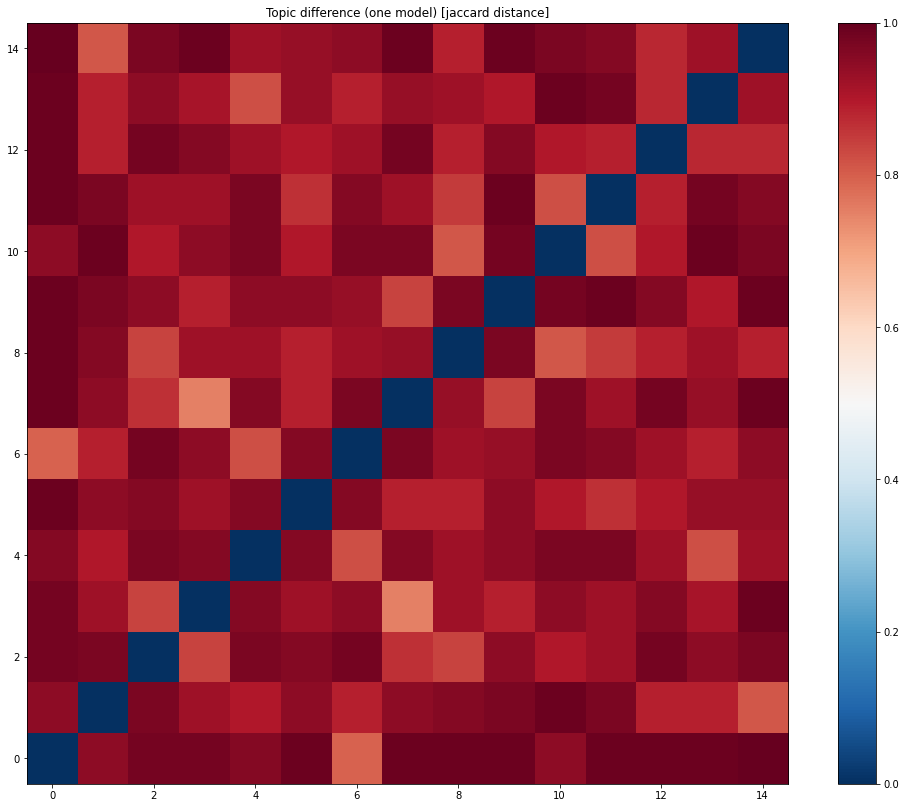

In [ ]:
mdiff, annotation = best_lda_model1.diff(best_lda_model1, distance='jaccard', num_words=50)
plot_difference(mdiff, title="Topic difference (one model) [jaccard distance]", annotation=annotation)

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis1 = pyLDAvis.gensim.prepare(best_lda_model1, gensim_corpus, gensim_dict)
vis1

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.094774  0.123984       1        1  11.105497
10    -0.081593 -0.017217       2        1  10.050200
11    -0.088546 -0.013224       3        1   8.560476
14     0.039773 -0.175507       4        1   8.047543
5     -0.113839 -0.034483       5        1   6.934448
2     -0.087490  0.043639       6        1   6.691117
3     -0.072270  0.030682       7        1   6.597189
13     0.083246 -0.009985       8        1   6.386316
1      0.091262 -0.149689       9        1   6.159873
8     -0.047536 -0.031775      10        1   6.002903
4      0.113807  0.053061      11        1   5.525934
0      0.134803  0.133630      12        1   5.470295
6      0.143534  0.063127      13        1   4.884760
12     0.002300 -0.089480      14        1   3.925141
9     -0.022678  0.073238      15        1   3.658309, topic_info=           Term          Freq         Total Category  logprob  loglift
183     процент  40689.000000  40689.000000  Default  30.0000  30.0000
5475       матч  11791.000000  11791.000000  Default  29.0000  29.0000
1242    украина  22801.000000  22801.000000  Default  28.0000  28.0000
3      компания  40724.000000  40724.000000  Default  27.0000  27.0000
317         суд  21754.000000  21754.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
56      большой    895.200806  10643.126953  Topic15  -6.2878   0.8325
1515      иметь    874.304871  10407.260742  Topic15  -6.3115   0.8313
545       часть    876.753723  15809.633789  Topic15  -6.3087   0.4160
1851  несколько    875.620300  19584.121094  Topic15  -6.3100   0.2006
705        изза    855.216553  14805.009766  Topic15  -6.3335   0.4568

[1340 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
5516      4  0.009621     11 город
5516      5  0.009621     11 город
5516      8  0.009621     11 город
5516     12  0.942899     11 город
5516     15  0.009621     11 город
...     ...       ...          ...
3254      6  0.027568  ясир арафат
3254      7  0.013784  ясир арафат
3254     10  0.926966  ясир арафат
3254     12  0.003446  ясир арафат
3254     14  0.003446  ясир арафат

[13310 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 11, 12, 15, 6, 3, 4, 14, 2, 9, 5, 1, 7, 13, 10])

In [ ]:
%%time
best_lda_model2 = gensim.models.LdaMulticore(corpus=gensim_corpus,
                                           id2word=gensim_dict,
                                           num_topics=15, 
                                           random_state=100,                                           
                                           workers = 3,
                                           passes=1,
                                           eta = 0.2,
                                           alpha = 0.2
                                        )

CPU times: user 2min 32s, sys: 1.9 s, total: 2min 33s
Wall time: 2min 49s


In [ ]:
data_list[0]

'крупный сша нефтяной компания сша exxonmobil помощь компания катар построить техас терминал сжижение дальнейший экспорт природный газ общий стоимость десять миллиард доллар соответствующий соглашение exxonmobil подписывать qatar petroleum international передавать bloomberg реализация проект сторона образовывать дочерний предприятие golden pass products llc фирма прошлый год получать разрешение экспорт спг страна который сша иметься соглашение свободный торговля прием спг терминал golden pass работать 2010 год планироваться ежегодный объем поставка спг построить терминал составлять 156 миллион тонна проект должный получать окончательный одобрение американский власть апрель сообщаться exxonmobil также собираться построить самый большой мир плавучий завод выпуск спг сотрудничество англоавстралийский горнодобывающий bhp billiton затрата указанный проект оценка эксперт превышать 12 миллиард доллар мощность спгзавод достигать шестисемь миллион тонна год'

In [ ]:
best_lda_model2.get_document_topics(gensim_corpus[0])

[(1, 0.80055153), (8, 0.087567635), (12, 0.09015758)]

In [ ]:
# Compute Coherence Score
coherence_model_lda2 = CoherenceModel(model=best_lda_model2, texts=data_words, dictionary=gensim_dict, coherence='c_v')
coherence_lda2 = coherence_model_lda2.get_coherence()
print('Coherence Score: ', coherence_lda2)

Coherence Score:  0.6419986510567619


In [ ]:
pprint(best_lda_model2.print_topics())

[(0,
  '0.013*"матч" + 0.009*"команда" + 0.009*"сборная" + 0.008*"чемпионат" + '
  '0.006*"счет" + 0.006*"мир" + 0.005*"клуб" + 0.005*"игра" + 0.005*"место" + '
  '0.005*"победа"'),
 (1,
  '0.022*"процент" + 0.014*"компания" + 0.009*"миллион" + 0.008*"доллар" + '
  '0.008*"составлять" + 0.008*"тысяча" + 0.008*"миллиард" + 0.006*"рубль" + '
  '0.004*"рынок" + 0.004*"метр"'),
 (2,
  '0.010*"самолет" + 0.007*"военный" + 0.004*"сша" + 0.004*"ракета" + '
  '0.003*"аэропорт" + 0.003*"город" + 0.003*"авиакомпания" + '
  '0.003*"американский" + 0.003*"сирия" + 0.003*"корабль"'),
 (3,
  '0.007*"происходить" + 0.005*"результат" + 0.005*"погибать" + '
  '0.005*"находиться" + 0.004*"пожар" + 0.004*"взрыв" + 0.004*"город" + '
  '0.004*"около" + 0.004*"район" + 0.004*"пострадать"'),
 (4,
  '0.012*"фильм" + 0.006*"the" + 0.006*"игра" + 0.004*"картина" + 0.004*"роль" '
  '+ 0.004*"компания" + 0.004*"выходить" + 0.004*"американский" + '
  '0.004*"проект" + 0.004*"режиссер"'),
 (5,
  '0.006*"украина" + 

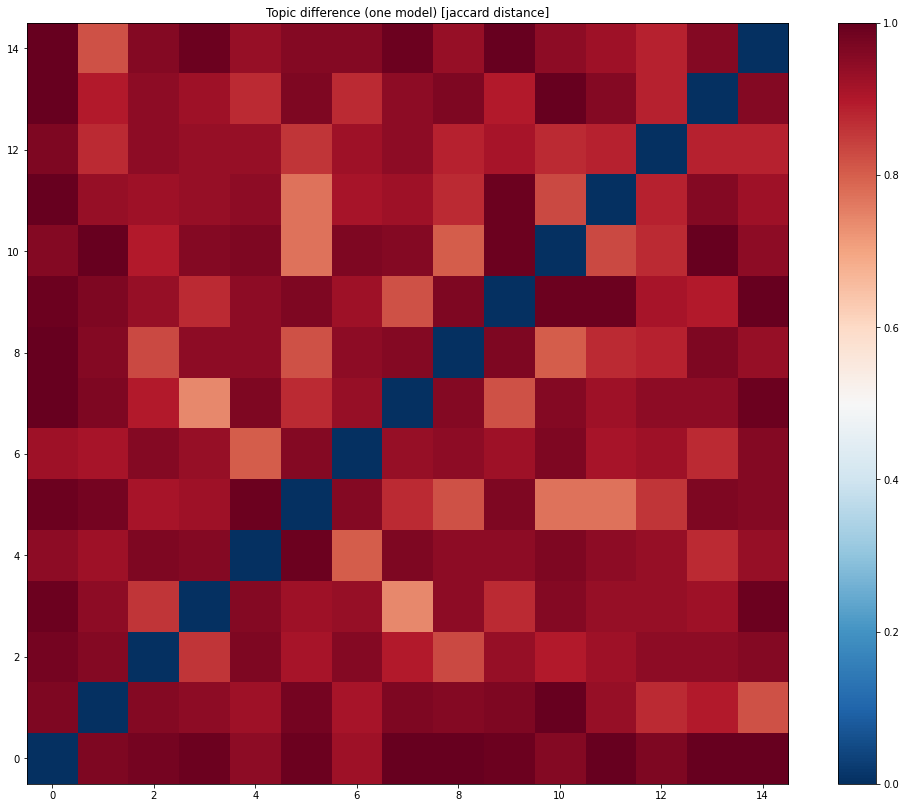

In [ ]:
mdiff, annotation = best_lda_model2.diff(best_lda_model2, distance='jaccard', num_words=50)
plot_difference(mdiff, title="Topic difference (one model) [jaccard distance]", annotation=annotation)

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis2 = pyLDAvis.gensim.prepare(best_lda_model2, gensim_corpus, gensim_dict)
vis2

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.056161  0.139414       1        1  11.207207
10    -0.071838 -0.006188       2        1   9.726433
11    -0.072858  0.005290       3        1   8.576503
1      0.024169 -0.156735       4        1   8.397198
5     -0.107007 -0.008802       5        1   7.613684
3     -0.060967  0.064796       6        1   6.459719
0      0.160544  0.069581       7        1   6.283673
2     -0.059349  0.048511       8        1   6.228378
8     -0.050431 -0.007390       9        1   6.134283
13     0.071210 -0.028372      10        1   6.100368
14    -0.017042 -0.150741      11        1   5.703036
4      0.125631  0.023929      12        1   5.201309
6      0.110600  0.007107      13        1   5.078827
9      0.013556  0.065977      14        1   4.087379
12    -0.010057 -0.066377      15        1   3.202004, topic_info=           Term          Freq         Total Category  logprob  loglift
183     процент  41047.000000  41047.000000  Default  30.0000  30.0000
5475       матч  11988.000000  11988.000000  Default  29.0000  29.0000
1242    украина  22171.000000  22171.000000  Default  28.0000  28.0000
17       доллар  30070.000000  30070.000000  Default  27.0000  27.0000
3      компания  40732.000000  40732.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
25       проект    765.764526  15974.551758  Topic15  -6.3105   0.4035
823      работа    769.119568  19750.011719  Topic15  -6.3061   0.1957
238   результат    739.091797  21461.777344  Topic15  -6.3459   0.0728
772       глава    739.760315  24292.244141  Topic15  -6.3450  -0.0502
386      мнение    727.683044  11197.113281  Topic15  -6.3615   0.7078

[1325 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
13459      1  0.013306          air
13459      2  0.002957          air
13459      3  0.007392          air
13459      4  0.029569          air
13459      5  0.004435          air
...      ...       ...          ...
3254      11  0.003460  ясир арафат
3254      12  0.003460  ясир арафат
3254      13  0.003460  ясир арафат
3254      14  0.003460  ясир арафат
3254      15  0.003460  ясир арафат

[15206 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 11, 12, 2, 6, 4, 1, 3, 9, 14, 15, 5, 7, 10, 13])

In [ ]:
%%time
best_lda_model3 = gensim.models.LdaMulticore(corpus=gensim_corpus,
                                           id2word=gensim_dict,
                                           num_topics=15, 
                                           random_state=100,                                           
                                           workers = 3,
                                           passes=1,
                                           eta = 10,
                                           alpha = 10
                                        )

CPU times: user 1min 59s, sys: 1.74 s, total: 2min 1s
Wall time: 2min 2s


In [ ]:
data_list[0]

'крупный сша нефтяной компания сша exxonmobil помощь компания катар построить техас терминал сжижение дальнейший экспорт природный газ общий стоимость десять миллиард доллар соответствующий соглашение exxonmobil подписывать qatar petroleum international передавать bloomberg реализация проект сторона образовывать дочерний предприятие golden pass products llc фирма прошлый год получать разрешение экспорт спг страна который сша иметься соглашение свободный торговля прием спг терминал golden pass работать 2010 год планироваться ежегодный объем поставка спг построить терминал составлять 156 миллион тонна проект должный получать окончательный одобрение американский власть апрель сообщаться exxonmobil также собираться построить самый большой мир плавучий завод выпуск спг сотрудничество англоавстралийский горнодобывающий bhp billiton затрата указанный проект оценка эксперт превышать 12 миллиард доллар мощность спгзавод достигать шестисемь миллион тонна год'

In [ ]:
best_lda_model3.get_document_topics(gensim_corpus[0])

[(0, 0.06582554),
 (1, 0.0669054),
 (2, 0.066905305),
 (3, 0.066218495),
 (4, 0.06800137),
 (5, 0.066448286),
 (6, 0.06573148),
 (7, 0.06642258),
 (8, 0.067143604),
 (9, 0.065733336),
 (10, 0.06797478),
 (11, 0.0669008),
 (12, 0.066957824),
 (13, 0.06579623),
 (14, 0.067035)]

In [ ]:
# Compute Coherence Score
coherence_model_lda3 = CoherenceModel(model=best_lda_model3, texts=data_words, dictionary=gensim_dict, coherence='c_v')
coherence_lda3 = coherence_model_lda3.get_coherence()
print('Coherence Score: ', coherence_lda3)

Coherence Score:  0.6191380841919797


In [ ]:
pprint(best_lda_model3.print_topics())

[(0,
  '0.003*"процент" + 0.002*"компания" + 0.002*"тысяча" + 0.002*"президент" + '
  '0.002*"сша" + 0.002*"рубль" + 0.002*"место" + 0.002*"доллар" + '
  '0.002*"украина" + 0.002*"глава"'),
 (1,
  '0.003*"процент" + 0.003*"компания" + 0.002*"тысяча" + 0.002*"суд" + '
  '0.002*"сша" + 0.002*"доллар" + 0.002*"около" + 0.002*"президент" + '
  '0.002*"новость" + 0.002*"сайт"'),
 (2,
  '0.003*"компания" + 0.002*"процент" + 0.002*"президент" + 0.002*"дело" + '
  '0.002*"тысяча" + 0.002*"рубль" + 0.002*"москва" + 0.002*"город" + '
  '0.002*"власть" + 0.002*"работа"'),
 (3,
  '0.003*"процент" + 0.002*"компания" + 0.002*"миллион" + 0.002*"президент" + '
  '0.002*"составлять" + 0.002*"рубль" + 0.002*"представитель" + 0.002*"сша" + '
  '0.002*"дело" + 0.002*"глава"'),
 (4,
  '0.003*"президент" + 0.003*"компания" + 0.002*"сша" + 0.002*"доллар" + '
  '0.002*"тысяча" + 0.002*"процент" + 0.002*"дело" + 0.002*"миллион" + '
  '0.002*"москва" + 0.002*"работа"'),
 (5,
  '0.003*"процент" + 0.002*"компания

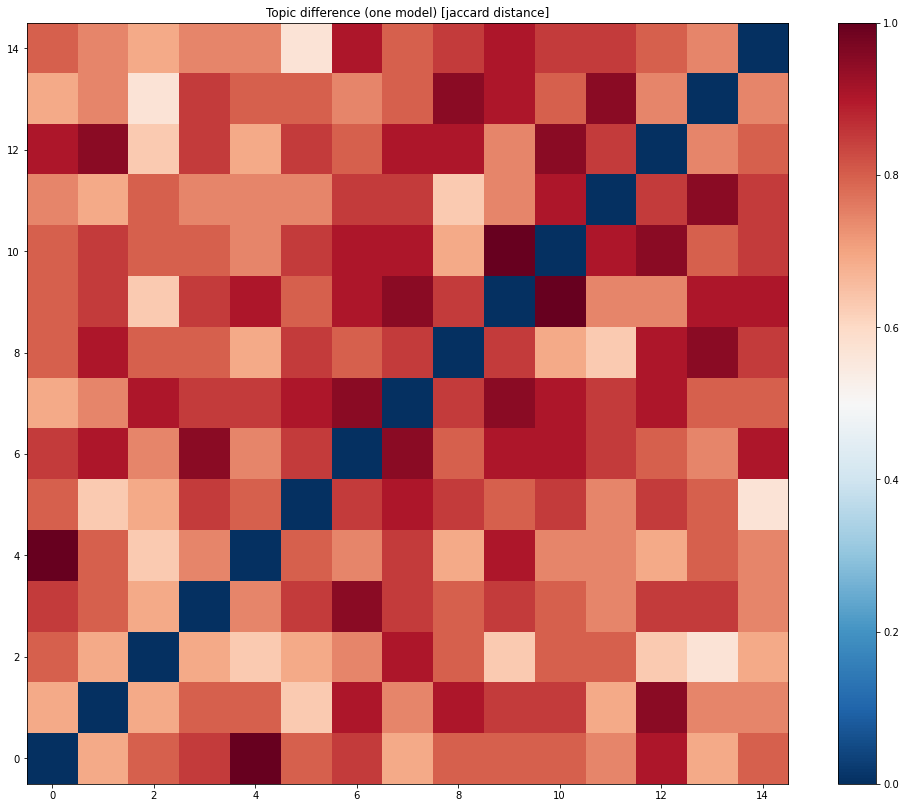

In [ ]:
mdiff, annotation = best_lda_model3.diff(best_lda_model3, distance='jaccard', num_words=50)
plot_difference(mdiff, title="Topic difference (one model) [jaccard distance]", annotation=annotation)

These parameters cause too little sparsity, this not good for the quality of topics, the difference is insignificant.

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis3 = pyLDAvis.gensim.prepare(best_lda_model3, gensim_corpus, gensim_dict)
vis3

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
11    -0.001506 -0.001572       1        1  6.679515
5     -0.000604 -0.000478       2        1  6.675747
10    -0.000316  0.000633       3        1  6.671469
14    -0.000998  0.000066       4        1  6.670800
12     0.001631 -0.000013       5        1  6.668683
2     -0.000074 -0.000252       6        1  6.667502
7      0.000091  0.000243       7        1  6.667027
3      0.000344  0.000267       8        1  6.666095
4     -0.000339  0.000529       9        1  6.663869
6      0.000390 -0.000278      10        1  6.663431
8      0.000037  0.000254      11        1  6.663201
9      0.001188 -0.001437      12        1  6.662895
1     -0.000660  0.001221      13        1  6.662530
0      0.000510  0.000184      14        1  6.659197
13     0.000306  0.000633      15        1  6.658036, topic_info=               Term          Freq         Total Category  logprob  loglift
17           доллар  24270.000000  24270.000000  Default  30.0000  30.0000
183         процент  32405.000000  32405.000000  Default  29.0000  29.0000
720           город  17061.000000  17061.000000  Default  28.0000  28.0000
899       президент  27869.000000  27869.000000  Default  27.0000  27.0000
1729            риа  11731.000000  11731.000000  Default  26.0000  26.0000
...             ...           ...           ...      ...      ...      ...
1345  представитель   1188.579224  19566.289062  Topic15  -6.6033  -0.0917
153      информация   1066.286865  16114.004883  Topic15  -6.7119  -0.0062
236           рубль   1183.865356  19900.376953  Topic15  -6.6073  -0.1126
16         миллиард   1047.806152  16085.179688  Topic15  -6.7294  -0.0219
772           глава   1081.364014  19516.757812  Topic15  -6.6978  -0.1837

[1114 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
155       1  0.065213      10
155       2  0.051180      10
155       3  0.080484      10
155       4  0.084818      10
155       5  0.072126      10
...     ...       ...     ...
806      11  0.059464  январь
806      12  0.078711  январь
806      13  0.060038  январь
806      14  0.068082  январь
806      15  0.061283  январь

[8565 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 6, 11, 15, 13, 3, 8, 4, 5, 7, 9, 10, 2, 1, 14])

Let's increase sparsity to create independent interpretive topics.

In [ ]:
%%time
best_lda_model4 = gensim.models.LdaMulticore(corpus=gensim_corpus,
                                           id2word=gensim_dict,
                                           num_topics=15, 
                                           random_state=100,                                           
                                           workers = 3,
                                           passes=1,
                                           eta = 0.01,
                                           alpha = 0.01
                                        )

CPU times: user 2min 29s, sys: 2.21 s, total: 2min 31s
Wall time: 2min 52s


In [ ]:
data_list[0]

'крупный сша нефтяной компания сша exxonmobil помощь компания катар построить техас терминал сжижение дальнейший экспорт природный газ общий стоимость десять миллиард доллар соответствующий соглашение exxonmobil подписывать qatar petroleum international передавать bloomberg реализация проект сторона образовывать дочерний предприятие golden pass products llc фирма прошлый год получать разрешение экспорт спг страна который сша иметься соглашение свободный торговля прием спг терминал golden pass работать 2010 год планироваться ежегодный объем поставка спг построить терминал составлять 156 миллион тонна проект должный получать окончательный одобрение американский власть апрель сообщаться exxonmobil также собираться построить самый большой мир плавучий завод выпуск спг сотрудничество англоавстралийский горнодобывающий bhp billiton затрата указанный проект оценка эксперт превышать 12 миллиард доллар мощность спгзавод достигать шестисемь миллион тонна год'

In [ ]:
best_lda_model4.get_document_topics(gensim_corpus[0])

[(1, 0.1776785), (14, 0.8211413)]

In [ ]:
# Compute Coherence Score
coherence_model_lda4 = CoherenceModel(model=best_lda_model4, texts=data_words, dictionary=gensim_dict, coherence='c_v')
coherence_lda4 = coherence_model_lda4.get_coherence()
print('Coherence Score: ', coherence_lda4)

Coherence Score:  0.6313864480212327


In [ ]:
pprint(best_lda_model4.print_topics())

[(0,
  '0.013*"матч" + 0.009*"команда" + 0.009*"сборная" + 0.008*"чемпионат" + '
  '0.006*"счет" + 0.006*"игра" + 0.006*"мир" + 0.005*"место" + 0.005*"победа" '
  '+ 0.004*"второй"'),
 (1,
  '0.027*"процент" + 0.011*"компания" + 0.009*"тысяча" + 0.009*"миллион" + '
  '0.008*"составлять" + 0.007*"доллар" + 0.006*"рубль" + 0.005*"миллиард" + '
  '0.004*"рынок" + 0.004*"метр"'),
 (2,
  '0.010*"самолет" + 0.006*"военный" + 0.004*"сша" + 0.004*"ракета" + '
  '0.004*"аэропорт" + 0.004*"сирия" + 0.004*"город" + 0.003*"авиакомпания" + '
  '0.003*"американский" + 0.003*"находиться"'),
 (3,
  '0.006*"происходить" + 0.005*"результат" + 0.004*"находиться" + '
  '0.004*"погибать" + 0.004*"пожар" + 0.004*"город" + 0.004*"область" + '
  '0.004*"около" + 0.004*"взрыв" + 0.004*"район"'),
 (4,
  '0.011*"фильм" + 0.006*"the" + 0.005*"игра" + 0.005*"проект" + '
  '0.004*"компания" + 0.004*"картина" + 0.004*"роль" + 0.004*"американский" + '
  '0.004*"сша" + 0.004*"режиссер"'),
 (5,
  '0.007*"дело" + 0.005*

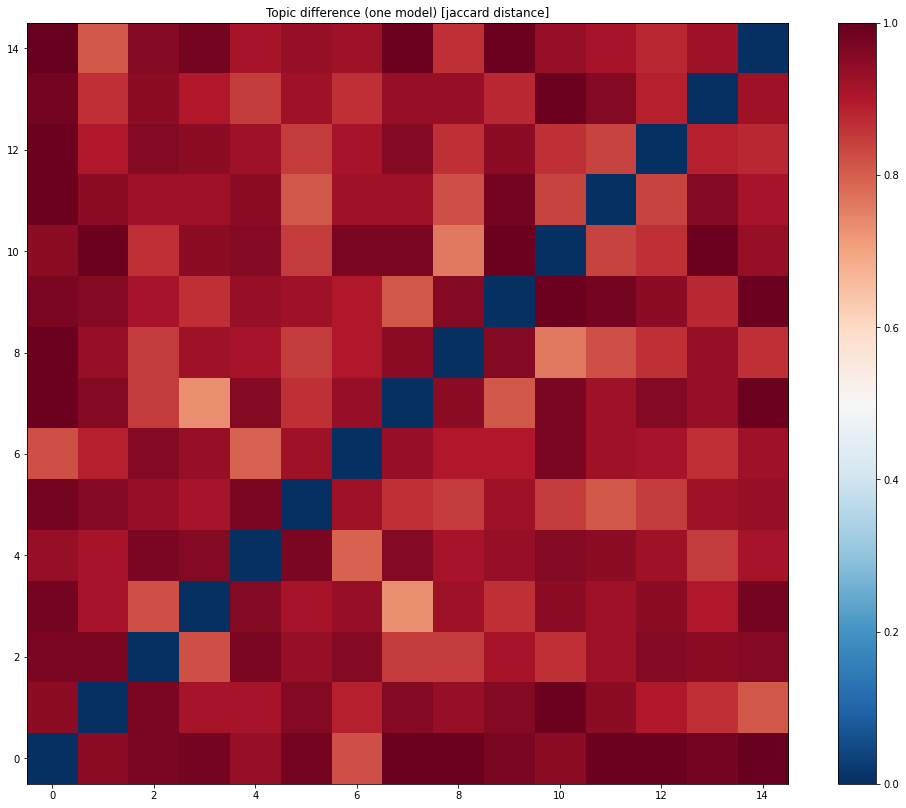

In [ ]:
mdiff, annotation = best_lda_model4.diff(best_lda_model4, distance='jaccard', num_words=50)
plot_difference(mdiff, title="Topic difference (one model) [jaccard distance]", annotation=annotation)

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis4 = pyLDAvis.gensim.prepare(best_lda_model4, gensim_corpus, gensim_dict)
vis4

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.087787 -0.116713       1        1  11.267549
10     0.077462  0.017101       2        1   9.889607
11     0.081135  0.008452       3        1   8.701089
14    -0.031460  0.162229       4        1   8.051242
5      0.108557  0.030164       5        1   7.173959
2      0.086264 -0.043383       6        1   6.879855
3      0.067145 -0.027806       7        1   6.527386
1     -0.081241  0.141467       8        1   6.277429
13    -0.085241  0.022079       9        1   6.194454
0     -0.130736 -0.128158      10        1   5.787118
8      0.038227  0.029470      11        1   5.712577
4     -0.105844 -0.051698      12        1   5.615697
6     -0.125874 -0.052051      13        1   4.773685
9      0.013629 -0.063830      14        1   3.850323
12     0.000190  0.072679      15        1   3.298013, topic_info=            Term          Freq         Total Category  logprob  loglift
183      процент  40910.000000  40910.000000  Default  30.0000  30.0000
1242     украина  22572.000000  22572.000000  Default  29.0000  29.0000
5475        матч  11937.000000  11937.000000  Default  28.0000  28.0000
3       компания  40847.000000  40847.000000  Default  27.0000  27.0000
317          суд  21987.000000  21987.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
45       миллион    931.140198  28298.134766  Topic15  -6.1444  -0.0023
772        глава    907.504944  24497.056641  Topic15  -6.1701   0.1162
16      миллиард    835.468811  20389.796875  Topic15  -6.2528   0.2171
1223  предлагать    771.917236  10152.958008  Topic15  -6.3319   0.8352
26       сторона    752.867432  14078.367188  Topic15  -6.3569   0.4833

[1344 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
7135      1  0.005961  53 процент
7135      2  0.011922  53 процент
7135      3  0.005961  53 процент
7135      4  0.053650  53 процент
7135      5  0.005961  53 процент
...     ...       ...         ...
8083     11  0.005006    янукович
8083     12  0.004380    янукович
8083     13  0.005632    янукович
8083     14  0.001252    янукович
8083     15  0.090111    янукович

[14071 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 11, 12, 15, 6, 3, 4, 2, 14, 1, 9, 5, 7, 10, 13])

In [ ]:
%%time
best_lda_model5 = gensim.models.LdaMulticore(corpus=gensim_corpus,
                                           id2word=gensim_dict,
                                           num_topics=15, 
                                           random_state=100,                                           
                                           workers = 3,
                                           passes=1,
                                           eta = 0.005,
                                           alpha = 0.01
                                        )

CPU times: user 2min 30s, sys: 2.13 s, total: 2min 33s
Wall time: 2min 50s


In [ ]:
data_list[0]

'крупный сша нефтяной компания сша exxonmobil помощь компания катар построить техас терминал сжижение дальнейший экспорт природный газ общий стоимость десять миллиард доллар соответствующий соглашение exxonmobil подписывать qatar petroleum international передавать bloomberg реализация проект сторона образовывать дочерний предприятие golden pass products llc фирма прошлый год получать разрешение экспорт спг страна который сша иметься соглашение свободный торговля прием спг терминал golden pass работать 2010 год планироваться ежегодный объем поставка спг построить терминал составлять 156 миллион тонна проект должный получать окончательный одобрение американский власть апрель сообщаться exxonmobil также собираться построить самый большой мир плавучий завод выпуск спг сотрудничество англоавстралийский горнодобывающий bhp billiton затрата указанный проект оценка эксперт превышать 12 миллиард доллар мощность спгзавод достигать шестисемь миллион тонна год'

In [ ]:
best_lda_model5.get_document_topics(gensim_corpus[0])

[(1, 0.12701243), (12, 0.039534383), (14, 0.8323637)]

In [ ]:
# Compute Coherence Score
coherence_model_lda5 = CoherenceModel(model=best_lda_model5, texts=data_words, dictionary=gensim_dict, coherence='c_v')
coherence_lda5 = coherence_model_lda5.get_coherence()
print('Coherence Score: ', coherence_lda5)

Coherence Score:  0.6353702005178696


In [ ]:
pprint(best_lda_model5.print_topics())

[(0,
  '0.013*"матч" + 0.009*"команда" + 0.009*"сборная" + 0.008*"чемпионат" + '
  '0.007*"счет" + 0.006*"игра" + 0.006*"мир" + 0.005*"победа" + 0.005*"место" '
  '+ 0.004*"второй"'),
 (1,
  '0.029*"процент" + 0.010*"тысяча" + 0.009*"компания" + 0.009*"составлять" + '
  '0.009*"миллион" + 0.007*"доллар" + 0.006*"рубль" + 0.005*"миллиард" + '
  '0.005*"метр" + 0.004*"рынок"'),
 (2,
  '0.011*"самолет" + 0.006*"военный" + 0.004*"сша" + 0.004*"ракета" + '
  '0.004*"аэропорт" + 0.004*"сирия" + 0.004*"город" + 0.003*"авиакомпания" + '
  '0.003*"американский" + 0.003*"находиться"'),
 (3,
  '0.006*"происходить" + 0.005*"результат" + 0.004*"погибать" + '
  '0.004*"находиться" + 0.004*"город" + 0.004*"пожар" + 0.004*"взрыв" + '
  '0.004*"около" + 0.004*"область" + 0.004*"район"'),
 (4,
  '0.011*"фильм" + 0.006*"the" + 0.005*"игра" + 0.005*"проект" + '
  '0.005*"компания" + 0.004*"картина" + 0.004*"роль" + 0.004*"американский" + '
  '0.004*"сша" + 0.004*"режиссер"'),
 (5,
  '0.008*"дело" + 0.006*

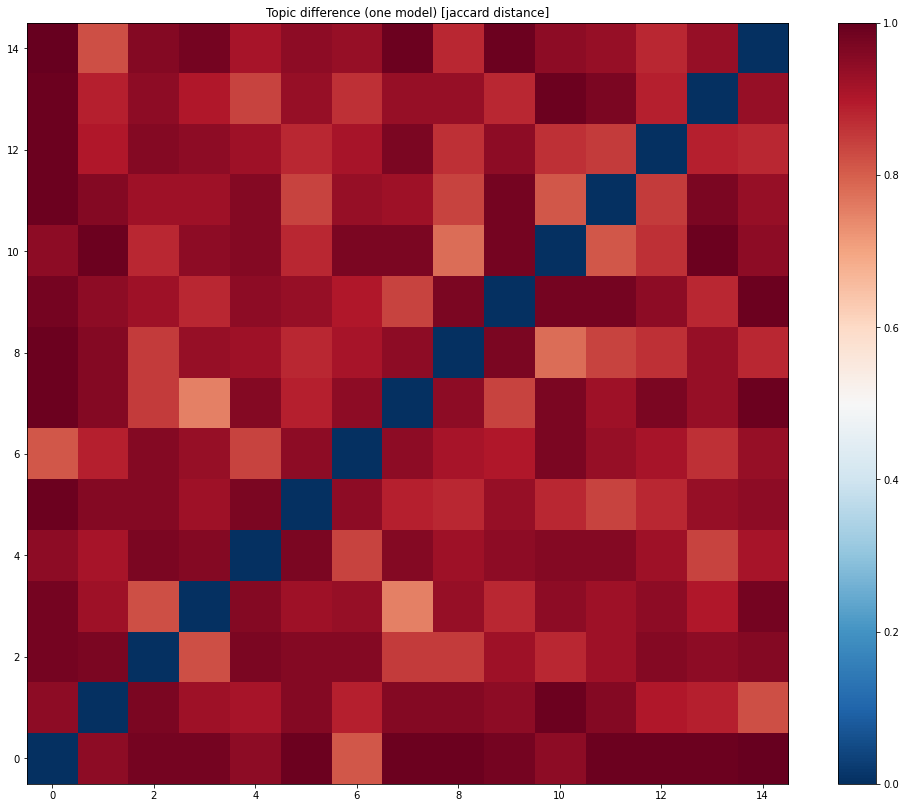

In [ ]:
mdiff, annotation = best_lda_model5.diff(best_lda_model5, distance='jaccard', num_words=50)
plot_difference(mdiff, title="Topic difference (one model) [jaccard distance]", annotation=annotation)

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis5 = pyLDAvis.gensim.prepare(best_lda_model5, gensim_corpus, gensim_dict)
vis5

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.093804 -0.112425       1        1  11.246873
10     0.081227  0.018267       2        1  10.175805
11     0.086245  0.014934       3        1   8.706070
14    -0.042970  0.164512       4        1   8.222696
5      0.109076  0.037663       5        1   6.780310
3      0.066431 -0.025729       6        1   6.616132
2      0.088357 -0.041024       7        1   6.530068
13    -0.087508  0.015276       8        1   6.233168
1     -0.096583  0.138451       9        1   5.939587
8      0.044695  0.030181      10        1   5.849169
0     -0.126038 -0.139090      11        1   5.700067
4     -0.102371 -0.052615      12        1   5.574354
6     -0.128038 -0.064320      13        1   5.000003
12    -0.005789  0.080501      14        1   3.712861
9      0.019463 -0.064583      15        1   3.712839, topic_info=           Term          Freq         Total Category  logprob  loglift
183     процент  40705.000000  40705.000000  Default  30.0000  30.0000
5475       матч  11886.000000  11886.000000  Default  29.0000  29.0000
1242    украина  22788.000000  22788.000000  Default  28.0000  28.0000
3      компания  40703.000000  40703.000000  Default  27.0000  27.0000
317         суд  21840.000000  21840.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
1515      иметь    863.237488  10385.238281  Topic15  -6.3386   0.8059
545       часть    891.874146  15779.375000  Topic15  -6.3059   0.4202
1851  несколько    878.856201  19627.000000  Topic15  -6.3206   0.1873
433        день    866.210144  21079.248047  Topic15  -6.3351   0.1015
320   сотрудник    849.341431  15740.087891  Topic15  -6.3548   0.3739

[1350 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
7135      2  0.005722   53 процент
7135      3  0.005722   53 процент
7135      4  0.062943   53 процент
7135      5  0.005722   53 процент
7135      6  0.011444   53 процент
...     ...       ...          ...
3254      7  0.048819  ясир арафат
3254     10  0.885718  ясир арафат
3254     11  0.003487  ясир арафат
3254     13  0.003487  ясир арафат
3254     14  0.003487  ясир арафат

[13757 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 11, 12, 15, 6, 4, 3, 14, 2, 9, 1, 5, 7, 13, 10])

So, we have some good sets of parameters, let's see the difference between the topics for 5 and 4 models. It is important to compare them.

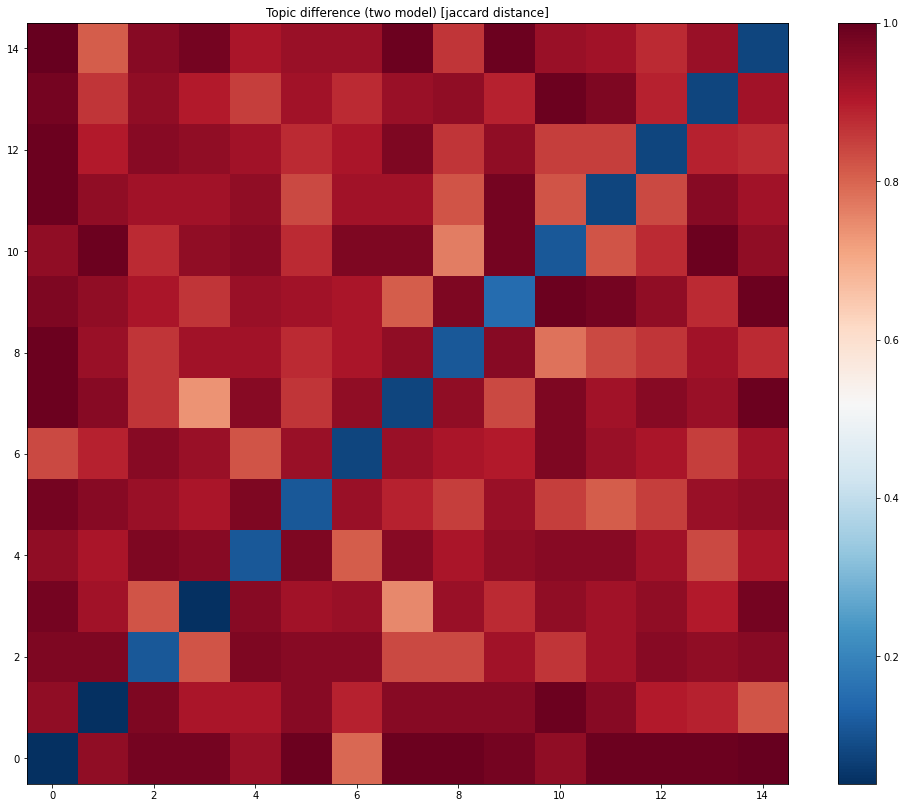

In [ ]:
mdiff, annotation = best_lda_model4.diff(best_lda_model5, distance='jaccard', num_words=50)
plot_difference(mdiff, title="Topic difference (two model) [jaccard distance]", annotation=annotation)

So, let's see the difference in practice.

In [ ]:
pprint(best_lda_model4.print_topics())

[(0,
  '0.013*"матч" + 0.009*"команда" + 0.009*"сборная" + 0.008*"чемпионат" + '
  '0.006*"счет" + 0.006*"игра" + 0.006*"мир" + 0.005*"место" + 0.005*"победа" '
  '+ 0.004*"второй"'),
 (1,
  '0.027*"процент" + 0.011*"компания" + 0.009*"тысяча" + 0.009*"миллион" + '
  '0.008*"составлять" + 0.007*"доллар" + 0.006*"рубль" + 0.005*"миллиард" + '
  '0.004*"рынок" + 0.004*"метр"'),
 (2,
  '0.010*"самолет" + 0.006*"военный" + 0.004*"сша" + 0.004*"ракета" + '
  '0.004*"аэропорт" + 0.004*"сирия" + 0.004*"город" + 0.003*"авиакомпания" + '
  '0.003*"американский" + 0.003*"находиться"'),
 (3,
  '0.006*"происходить" + 0.005*"результат" + 0.004*"находиться" + '
  '0.004*"погибать" + 0.004*"пожар" + 0.004*"город" + 0.004*"область" + '
  '0.004*"около" + 0.004*"взрыв" + 0.004*"район"'),
 (4,
  '0.011*"фильм" + 0.006*"the" + 0.005*"игра" + 0.005*"проект" + '
  '0.004*"компания" + 0.004*"картина" + 0.004*"роль" + 0.004*"американский" + '
  '0.004*"сша" + 0.004*"режиссер"'),
 (5,
  '0.007*"дело" + 0.005*

In [ ]:
data_list[800]

'али магомедов указ президент рф дмитрий медведев назначать пост министр внутренний дело дагестан это сообщаться сайт кремль новый назначение офицер фсб магомедов занимать пост секретарь совет безопасность республика предполагаться имя новый министр становиться известно суббота 18 июль однако пятница назначение ссылка анонимный источник сообщать газета коммерсант данные издание пост глава мвд дагестан претендовать московский местный чиновник кандидатура магомедов утверждать неоднократный встреча министр внутренний дело рф рашида нургалиев президент республика муха алиев магомедов пост занимать убивать 5 июнь махачкала адильгерей магомедтагир министр ряд сотрудник дагестанский мвд убивать время свадьба дочь подчиненный магомедтагиров преступник использовать оружие стоять вооружение российский спецслужба автомат вал снайперский винтовка винторез убийство магомедтагиров связывать профессиональный деятельность версия министр собираться принимать участие выборы президент дагестан 2010 год'

In [ ]:
best_lda_model1.get_document_topics(gensim_corpus[800])

[(5, 0.26082084), (7, 0.24808884), (10, 0.48516443)]

In [ ]:
best_lda_model4.get_document_topics(gensim_corpus[800])

[(5, 0.2818823), (7, 0.25663793), (10, 0.4605853)]

In [ ]:
best_lda_model5.get_document_topics(gensim_corpus[800])

[(5, 0.24407268), (7, 0.2566756), (10, 0.4983572)]

In [ ]:
data_list[80000]

'петербург неизвестный мужчина сообщать телефон угроза взрыв отделение милиция сообщать риа новость прессцентр главный управление дело го чс звонить утверждать бомба закладывать помещение 74го 75го городской отделение красносельский невский район город рувд невский район 74м отделение милиция красносельский рувд журналист подтвердить информация милиционер проверять помещение эвакуация сотрудник отделение проводиться поздно прибыль кинолог собака взрывотехника омон называть телефонный террорист отделение милиция бомба оказываться'

In [ ]:
best_lda_model1.get_document_topics(gensim_corpus[80000])

[(3, 0.23152639), (7, 0.7549319)]

In [ ]:
best_lda_model4.get_document_topics(gensim_corpus[80000])

[(3, 0.1624478), (7, 0.8354936)]

In [ ]:
best_lda_model5.get_document_topics(gensim_corpus[80000])

[(3, 0.22799832), (7, 0.7699431)]

In [ ]:
data_list[10000]

'военный управление следственный комитет россия приобретать китайский комплекс извлечение данный смартфон компьютер это сообщать русский служба бибиси ведомство закупать чемодан комплекс idc8811 forensic magicube общий стоимость пять миллион рубль устройство уметь обнаруживать декодировать история сообщение популярный мессенджер включая telegram viber skype также добывать данные пользователь facebook twitter девайс китайский компания magicube способный взламывать смартфон управление операционный система ios android позволять хакер получать доступ адрес электронный почта номер телефон владелец отмечаться взлом iphone уходить порядок девять минута рано следственный комитет ориентироваться израильский американский решение политический ситуация изменяться определять политика большой следственный комитет плотно работать военноследственный управление акцент делать техника который наиболее защищать возможный уязвимость мочь эксплуатироваться мало 10 год объяснять выбор ведомство дмитрий сатур

In [ ]:
best_lda_model1.get_document_topics(gensim_corpus[10000])

[(5, 0.3795884), (13, 0.6143083)]

In [ ]:
best_lda_model4.get_document_topics(gensim_corpus[10000])

[(5, 0.3789345), (13, 0.6201444)]

In [ ]:
best_lda_model5.get_document_topics(gensim_corpus[10000])

[(5, 0.3796603), (13, 0.6194186)]

In [ ]:
data_list[100000]

'оптовый цена сжиженный газ бытовой нужда повышаться начинать следующий год 15 процент сообщаться прессрелиз федеральный служба тариф тонна газ учет ндс стоить 6613 тысяча рубль 2009 год тариф повышаться значительно 28 процент 2008 год рост составлять 30 процент сжиженный газ являться основной вид топливо территория удалять система магистральный газопровод россия сельский местность уровень газификация превышать 45 процент ранее сообщаться согласно утверждать правительство антикризисный тарифный план стоимость газ весь потребитель 2010 год вырастать 266 процент рост цена население составлять 274 процент промышленность 265 процент 2011 год цена увеличивать среднее 157 процент 2012м 151 процент'

In [ ]:
best_lda_model1.get_document_topics(gensim_corpus[100000])

[(1, 0.7121579), (12, 0.279666)]

In [ ]:
best_lda_model4.get_document_topics(gensim_corpus[100000])

[(1, 0.75435936), (12, 0.24440433)]

In [ ]:
best_lda_model5.get_document_topics(gensim_corpus[100000])

[(1, 0.7393661), (12, 0.25939754)]

From my point of view, the 4-th model is the best. Let's increase the number of passes.

In [ ]:
%%time
best_lda_model_final = gensim.models.LdaMulticore(corpus=gensim_corpus,
                                           id2word=gensim_dict,
                                           num_topics=15, 
                                           random_state=100,                                           
                                           workers = 3,
                                           passes=3,
                                           eta = 0.01,
                                           alpha = 0.01
                                        )

CPU times: user 7min 38s, sys: 5.34 s, total: 7min 43s
Wall time: 8min 12s


In [ ]:
pprint(best_lda_model_final.print_topics())

[(0,
  '0.015*"матч" + 0.011*"команда" + 0.010*"сборная" + 0.009*"чемпионат" + '
  '0.009*"клуб" + 0.007*"счет" + 0.006*"мир" + 0.006*"игра" + 0.005*"место" + '
  '0.005*"победа"'),
 (1,
  '0.026*"процент" + 0.017*"миллион" + 0.014*"тысяча" + 0.013*"компания" + '
  '0.011*"составлять" + 0.011*"доллар" + 0.011*"рубль" + 0.006*"миллиард" + '
  '0.005*"миллион доллар" + 0.005*"стоимость"'),
 (2,
  '0.016*"самолет" + 0.012*"военный" + 0.006*"ракета" + 0.005*"сша" + '
  '0.005*"корабль" + 0.005*"аэропорт" + 0.005*"оборона" + 0.005*"полет" + '
  '0.004*"авиакомпания" + 0.004*"сила"'),
 (3,
  '0.008*"происходить" + 0.007*"результат" + 0.007*"погибать" + 0.007*"город" '
  '+ 0.007*"находиться" + 0.006*"взрыв" + 0.005*"район" + 0.005*"около" + '
  '0.005*"место" + 0.005*"пострадать"'),
 (4,
  '0.015*"фильм" + 0.008*"игра" + 0.007*"the" + 0.005*"роль" + 0.005*"картина" '
  '+ 0.005*"выходить" + 0.005*"актер" + 0.005*"американский" + '
  '0.005*"режиссер" + 0.004*"главный"'),
 (5,
  '0.007*"украи

In [ ]:
best_lda_model_final.get_document_topics(gensim_corpus[800])

[(2, 0.022061346), (5, 0.48811212), (7, 0.25887495), (10, 0.23013158)]

In [ ]:
best_lda_model_final.get_document_topics(gensim_corpus[80000])

[(3, 0.26224774), (7, 0.7356937)]

In [ ]:
best_lda_model_final.get_document_topics(gensim_corpus[10000])

[(1, 0.040713176),
 (2, 0.04545448),
 (5, 0.3245186),
 (8, 0.019793311),
 (13, 0.568812)]

In [ ]:
best_lda_model_final.get_document_topics(gensim_corpus[100000])

[(1, 0.6904424), (12, 0.30832133)]

In [ ]:
# Compute Coherence Score
coherence_model_lda_final = CoherenceModel(model=best_lda_model_final, texts=data_words, dictionary=gensim_dict, coherence='c_v')
coherence_lda_final = coherence_model_lda_final.get_coherence()
print('Coherence Score: ', coherence_lda_final)

Coherence Score:  0.6646124436190975


In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis_final = pyLDAvis.gensim.prepare(best_lda_model_final, gensim_corpus, gensim_dict)
vis_final

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10    -0.109116  0.025732       1        1  10.139125
7     -0.131929 -0.157354       2        1   9.454719
8     -0.078248 -0.034995       3        1   7.969779
11    -0.136151  0.020759       4        1   7.697206
14     0.061578  0.227223       5        1   7.101844
1      0.119606  0.188351       6        1   7.062253
5     -0.172448  0.054761       7        1   6.767918
3     -0.095559 -0.076499       8        1   6.446713
0      0.124588 -0.100112       9        1   6.073306
12    -0.023437  0.151010      10        1   5.515251
6      0.120418 -0.070027      11        1   5.220242
2     -0.056199 -0.014554      12        1   5.181140
13     0.123617  0.006439      13        1   5.177214
4      0.170829 -0.126955      14        1   5.121080
9      0.082450 -0.093779      15        1   5.072205, topic_info=           Term          Freq         Total Category  logprob  loglift
183     процент  39569.000000  39569.000000  Default  30.0000  30.0000
317         суд  22598.000000  22598.000000  Default  29.0000  29.0000
3      компания  40462.000000  40462.000000  Default  28.0000  28.0000
899   президент  34592.000000  34592.000000  Default  27.0000  27.0000
17       доллар  29788.000000  29788.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
795      случай   1602.196411  11419.821289  Topic15  -6.0321   1.0174
1851  несколько   1715.149048  19697.693359  Topic15  -5.9640   0.5404
1700  удаваться   1492.788208   8852.784180  Topic15  -6.1028   1.2013
55        самый   1600.813354  15125.753906  Topic15  -6.0330   0.7355
588      тысяча   1550.324829  32201.232422  Topic15  -6.0650  -0.0521

[1459 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
15433      5  0.007979         2024
15433      6  0.021277         2024
15433     10  0.944180         2024
15433     15  0.021277         2024
15441      5  0.008298     2024 год
...      ...       ...          ...
2195      15  0.036161         язык
14439      6  0.004871       яндекс
14439     13  0.991286       яндекс
3242       3  0.997056         ясир
3254       3  0.997649  ясир арафат

[8218 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 8, 9, 12, 15, 2, 6, 4, 1, 13, 7, 3, 14, 5, 10])

## Ok, we have our model and the best parameters for a small stratified dataset. Let's solve our task and find the topics in the whole data.